In [1]:
import pandas as pd 
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
get_ipython().system('pip install gTTS')
from gtts import gTTS

import os


In [2]:
import re
import nltk
from nltk.util import pr
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword = set(stopwords.words("english"))

In [3]:
df = pd.read_csv(r"C:\Users\ravi\Documents\twitter_data final.csv")
print(df.head())

   count  hate_speech  offensive_language  neither  class  \
0      3            0                   0        3      2   
1      3            0                   3        0      1   
2      3            0                   3        0      1   
3      3            0                   2        1      1   
4      6            0                   6        0      1   

                                               tweet  
0  !!! RT @mayasolovely: As a woman you shouldn't...  
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...  
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...  
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...  
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...  


In [4]:
df['labels']= df['class'].map({0:"Hate speech Detected",1:"offensive language detected",2:"No hate and offensive speech dected"})
print(df.head())



   count  hate_speech  offensive_language  neither  class  \
0      3            0                   0        3      2   
1      3            0                   3        0      1   
2      3            0                   3        0      1   
3      3            0                   2        1      1   
4      6            0                   6        0      1   

                                               tweet  \
0  !!! RT @mayasolovely: As a woman you shouldn't...   
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...   
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...   
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...   
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...   

                                labels  
0  No hate and offensive speech dected  
1          offensive language detected  
2          offensive language detected  
3          offensive language detected  
4          offensive language detected  


In [5]:
df = df[["tweet" , "labels"]]
df.head()


,tweet,labels
0,!!! RT @mayasolovely: As a woman you shouldn't...,No hate and offensive speech dected
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,offensive language detected
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,offensive language detected
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,offensive language detected
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,offensive language detected


In [6]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]','',text)
    text = re.sub('https?://\s+|www\.\s+','',text)
    text = re.sub('<.*?>+','',text)
    text = re.sub('[%s]' % re.escape(string.punctuation),'',text)
    text = re.sub('\n','',text)
    text = re.sub('\w*\d\w*','',text)
    text = [word for word in text.split(' ') if word not in stopword]
    text = " ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text = " ".join(text)
    return text
df["tweet"] = df["tweet"].apply(clean)
print(df.head())
    

                                               tweet  \
0   rt mayasolov woman shouldnt complain clean ho...   
1   rt  boy dat coldtyga dwn bad cuffin dat hoe  ...   
2   rt urkindofbrand dawg rt  ever fuck bitch sta...   
3             rt cganderson vivabas look like tranni   
4   rt shenikarobert shit hear might true might f...   

                                labels  
0  No hate and offensive speech dected  
1          offensive language detected  
2          offensive language detected  
3          offensive language detected  
4          offensive language detected  


In [3]:
import pandas as pd
import numpy as np
df = pd.read_csv(r"C:\Users\ravi\Documents\twitter_data.csv")
df['labels']= df['class'].map({0:"Hate speech Detected",1:"offensive language detected",2:"No hate and offensive speech dected"})

x = np.array(df["tweet"])
y = np.array(df["labels"])


cv = CountVectorizer()
x = cv.fit_transform(x)

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.50, random_state = 42)
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)



NameError: name 'CountVectorizer' is not defined

In [1]:
from sklearn.tree import export_text

# Assuming clf is your trained DecisionTreeClassifier
tree_rules = export_text(clf, feature_names=cv.get_feature_names_out())
print(tree_rules)



NameError: name 'clf' is not defined

[Text(0.957163901001958, 0.9975, 'x[4886] <= 0.5\ngini = 0.365\nsamples = 12391\nvalue = [687, 2072, 9632]'),
 Text(0.9272861974844516, 0.9925, 'x[4893] <= 0.5\ngini = 0.465\nsamples = 8466\nvalue = [591, 2068, 5807]'),
 Text(0.9076805731678197, 0.9875, 'x[14715] <= 0.5\ngini = 0.515\nsamples = 7038\nvalue = [562, 2068, 4408]'),
 Text(0.8901374612397137, 0.9825, 'x[25254] <= 0.5\ngini = 0.553\nsamples = 5967\nvalue = [535, 2060, 3372]'),
 Text(0.8741701815351117, 0.9775, 'x[14706] <= 0.5\ngini = 0.583\nsamples = 5033\nvalue = [514, 2056, 2463]'),
 Text(0.8562561811704217, 0.9725, 'x[28079] <= 0.5\ngini = 0.594\nsamples = 4231\nvalue = [498, 2037, 1696]'),
 Text(0.8357233357623294, 0.9675, 'x[11436] <= 0.5\ngini = 0.592\nsamples = 4092\nvalue = [491, 2036, 1565]'),
 Text(0.811758478326196, 0.9625, 'x[22331] <= 0.5\ngini = 0.577\nsamples = 3896\nvalue = [408, 2036, 1452]'),
 Text(0.7977117811448378, 0.9575, 'x[3523] <= 0.5\ngini = 0.572\nsamples = 3783\nvalue = [400, 2036, 1347]'),
 Text

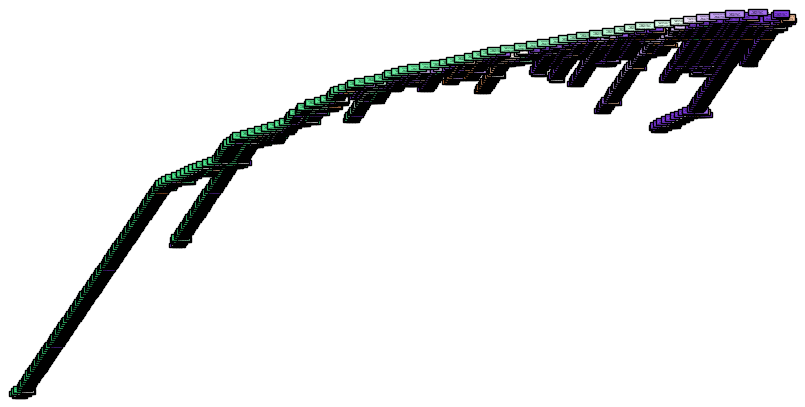

In [8]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
tree.plot_tree(clf,filled=True)

In [9]:
# Training Data Accuracy
train_predictions = clf.predict(x_train)
train_accuracy = np.mean(train_predictions == y_train)
print("Training Data Accuracy:", train_accuracy)

# Test Data Accuracy
test_predictions = clf.predict(x_test)
test_accuracy = np.mean(test_predictions == y_test)
print("Test Data Accuracy:", test_accuracy)

Training Data Accuracy: 1.0
Test Data Accuracy: 0.888879922530665


In [ ]:
import pandas as pd
!pip install SpeechRecognition
!pip install pyaudio




feedback_file = r"import pandas as pd"

feedback_file = r"C:\Users\ravi\Documents\twitter_data final.csv"
feedback_df = pd.read_csv(feedback_file)

# Function to collect user feedback

def collect_feedback(test_data, prediction):
    global feedback_df  # Declare feedback_df as global
    feedback = input(f"Is the following text '{test_data}' hate speech? (yes/no): ").lower()
    if feedback in ['yes', 'no']:
        
        feedback_numeric = 0 if feedback == 'yes' else 2
        
        if feedback_numeric == 0:
            new_feedback = pd.DataFrame({'tweet': [test_data], 'class': [feedback_numeric],'count':'3', 'hate_speech':'1', 'offensive_language':'3', 'neither':'0'})
            feedback_df = pd.concat([feedback_df, new_feedback], ignore_index=True)
        if feedback_numeric == 2:
            new_feedback = pd.DataFrame({'tweet': [test_data], 'class': [feedback_numeric],'count':'3', 'hate_speech':'0', 'offensive_language':'0', 'neither':'1'})
            feedback_df = pd.concat([feedback_df, new_feedback], ignore_index=True)
        
        feedback_df.to_csv(feedback_file, index=False)
        print("Thank you for your feedback!")
    else:
        print("Invalid feedback. Please enter 'yes' or 'no'.")

        
        

while True:
    import speech_recognition as sr


    recognizer = sr.Recognizer()

    
    with sr.Microphone() as source:
        print("Say something:")
        
        recognizer.adjust_for_ambient_noise(source)
        
        audio = recognizer.listen(source)

    
    try:
        print("Recognizing speech...")
        
        input_text = recognizer.recognize_google(audio)
        print("You said:", input_text)
    except sr.UnknownValueError:
        print("Google Speech Recognition could not understand audio")
    except sr.RequestError as e:
        print("Could not request results from Google Speech Recognition service; {0}".format(e))

    
    if input_text.lower() == 'close':
        break
    else:
        
        df = cv.transform([input_text]).toarray()
        print(clf.predict(df))
        prediction = input("is prediction is right or wrong: ")
        if prediction =='wrong':
            collect_feedback(input_text, prediction)
        else:
            print("Thank you")

feedback_df = pd.read_csv(feedback_file)

# Function to collect user feedback

def collect_feedback(test_data, prediction):
    global feedback_df  # Declare feedback_df as global
    feedback = input(f"Is the following text '{test_data}' hate speech? (yes/no): ").lower()
    if feedback in ['yes', 'no']:
        
        feedback_numeric = 0 if feedback == 'yes' else 2
        
        if feedback_numeric == 0:
            new_feedback = pd.DataFrame({'tweet': [test_data], 'class': [feedback_numeric],'count':'3', 'hate_speech':'1', 'offensive_language':'3', 'neither':'0'})
            feedback_df = pd.concat([feedback_df, new_feedback], ignore_index=True)
        if feedback_numeric == 2:
            new_feedback = pd.DataFrame({'tweet': [test_data], 'class': [feedback_numeric],'count':'3', 'hate_speech':'0', 'offensive_language':'0', 'neither':'1'})
            feedback_df = pd.concat([feedback_df, new_feedback], ignore_index=True)
        
        feedback_df.to_csv(feedback_file, index=False)
        print("Thank you for your feedback!")
    else:
        print("Invalid feedback. Please enter 'yes' or 'no'.")
while True:
    import speech_recognition as sr


    recognizer = sr.Recognizer()

    
    with sr.Microphone() as source:
        print("Say something:")
        
        recognizer.adjust_for_ambient_noise(source)
        
        audio = recognizer.listen(source)

    
    try:
        print("Recognizing speech...")
        
        input_text = recognizer.recognize_google(audio)
        print("You said:", input_text)
    except sr.UnknownValueError:
        print("Google Speech Recognition could not understand audio")
    except sr.RequestError as e:
        print("Could not request results from Google Speech Recognition service; {0}".format(e))

    
    if input_text.lower() == 'close':
        break
    else:
        
        df = cv.transform([input_text]).toarray()
        print(clf.predict(df))
        prediction = input("is prediction is right or wrong: ")
        if prediction =='wrong':
            collect_feedback(input_text, prediction)
        else:
            print("Thank you")



Say something:


In [ ]:
import tkinter as tk
from tkinter import messagebox
import speech_recognition as sr

feedback_file = r"C:\Users\ravi\Documents\twitter_data final.csv"



# Function to process user input and make predictions
def process_input():
    # Get user input from the text box
    input_text = input_entry.get()
    
    # Replace this with your actual code for text processing and prediction
    df = cv.transform([input_text]).toarray()
    prediction = clf.predict(df)
    
    # Display prediction
    messagebox.showinfo("Prediction", f"The prediction is: {prediction}")

# Function to collect user feedback
def collect_feedback():
    feedback_file = r"C:\Users\ravi\Documents\twitter_data final.csv"
    feedback_df =pd.read_csv(feedback_file)
    # Get user input from the text box
    test_data = input_entry.get()
    
    # Get user feedback from a message box
    feedback = messagebox.askyesno("Feedback", f"Is the following text '{test_data}' hate speech?")
    
    # Update feedback based on user response
    if feedback:
        feedback_numeric = 0
    else:
        feedback_numeric = 2
    
    # Update feedback DataFrame (replace this with your actual feedback collection code)
    if feedback_numeric == 0:
            new_feedback = pd.DataFrame({'tweet': [test_data], 'class': [feedback_numeric],'count':'3', 'hate_speech':'1', 'offensive_language':'3', 'neither':'0'})
            feedback_df = pd.concat([feedback_df, new_feedback], ignore_index=True)
    if feedback_numeric == 2:
            new_feedback = pd.DataFrame({'tweet': [test_data], 'class': [feedback_numeric],'count':'3', 'hate_speech':'0', 'offensive_language':'0', 'neither':'1'})
            feedback_df = pd.concat([feedback_df, new_feedback], ignore_index=True)
        
    #feedback_df = pd.concat([feedback_df, new_feedback], ignore_index=True)
    feedback_df.to_csv(feedback_file, index=False)
    messagebox.showinfo("Feedback", "Thank you for your feedback!")

# Function to recognize speech
def recognize_speech():
    # Initialize the recognizer
    recognizer = sr.Recognizer()

    # Use the default microphone as the audio source
    with sr.Microphone() as source:
        print("Say something:")
        # Adjust for ambient noise if needed
        recognizer.adjust_for_ambient_noise(source)
        # Listen for the user's input
        audio = recognizer.listen(source)
        print("Listening... Say something:")

    # Recognize speech using Google Speech Recognition
    try:
        print("Recognizing speech...")
        # Use Google Speech Recognition to convert speech to text
        input_text = recognizer.recognize_google(audio)
        input_entry.delete(0, tk.END)
        input_entry.insert(tk.END, input_text)
        print("You said:", input_text)
    except sr.UnknownValueError:
        print("Google Speech Recognition could not understand audio")
    except sr.RequestError as e:
        print("Could not request results from Google Speech Recognition service; {0}".format(e))

# Create the main application window
root = tk.Tk()
root.title("Hate Speech Detection")

# Set window size
window_width = 800
window_height = 600
root.geometry(f"{window_width}x{window_height}")

# Load background image
#background_image = Image.open("D:\hate speech detection project\hatspeech wallpaper 1.jpg")  # Load JPEG image using Pillow
#background_photo = ImageTk.PhotoImage(background_image)  # Convert image to PhotoImage format
#root.background_photo = background_photo  # Retain a reference to the image object

# Create a canvas to place the background image
#canvas = tk.Canvas(root, width=window_width, height=window_height)
#canvas.pack(fill=tk.BOTH, expand=True)
#canvas.create_image(0, 0, anchor=tk.NW, image=background_photo)

# Create input label and text entry
input_label = tk.Label(root, text="Enter text or speak:", font=("Arial", 16))
input_label.pack()

input_entry = tk.Entry(root, width=50, font=("Arial", 14))
input_entry.pack()

# Create buttons for processing input, collecting feedback, and recognizing speech
button_font = ("Arial", 16)
button_width = 20
button_height = 2

process_button = tk.Button(root, text="Process Input", font=button_font, width=button_width, height=button_height, command=process_input)
process_button.pack(pady=10)

feedback_button = tk.Button(root, text="Collect Feedback", font=button_font, width=button_width, height=button_height, command=collect_feedback)
feedback_button.pack(pady=10)

speech_button = tk.Button(root, text="Recognize Speech", font=button_font, width=button_width, height=button_height, command=recognize_speech)
speech_button.pack(pady=10)

# Run the main event loop
root.mainloop()


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\ravi\anaconda3\Lib\tkinter\__init__.py", line 1948, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\ravi\AppData\Local\Temp\ipykernel_5788\3210345867.py", line 15, in process_input
    df = cv.transform([input_text]).toarray()
         ^^
NameError: name 'cv' is not defined
Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\ravi\anaconda3\Lib\tkinter\__init__.py", line 1948, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\ravi\AppData\Local\Temp\ipykernel_5788\3210345867.py", line 24, in collect_feedback
    feedback_df =pd.read_csv(feedback_file)
                 ^^
NameError: name 'pd' is not defined


Say something:


In [ ]:
# Training Data Accuracy
train_predictions = clf.predict(x_train)
train_accuracy = np.mean(train_predictions == y_train)
print("Training Data Accuracy:", train_accuracy)

# Test Data Accuracy
test_predictions = clf.predict(x_test)
test_accuracy = np.mean(test_predictions == y_test)
print("Test Data Accuracy:", test_accuracy)


In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import label_binarize

# Binarize the labels
y_test_bin = label_binarize(y_test, classes=clf.classes_)

# Compute precision-recall curve for each class
precision = dict()
recall = dict()
for i in range(len(clf.classes_)):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_pred == clf.classes_[i])

# Plot precision-recall curve for each class
plt.figure()
for i in range(len(clf.classes_)):
    plt.plot(recall[i], precision[i], marker='.', label='Class {}'.format(clf.classes_[i]))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Multiclass Classification')
plt.legend()
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Load and preprocess your data
df = pd.read_csv(r"D:\hate speech detection project\project 5\twitter_data.csv")
df['labels'] = df['class'].map({0: "Hate speech Detected", 1: "offensive language detected", 2: "No hate and offensive speech detected"})

x = np.array(df["tweet"])
y = np.array(df["labels"])

cv = CountVectorizer()
x = cv.fit_transform(x)

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

# Train your Decision Tree Classifier (assuming clf is your trained model)
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

# Get feature names as a list
feature_names = cv.get_feature_names_out().tolist()

# Get class names as a list
class_names = df['labels'].unique().tolist()

# Plot the decision tree
plt.figure(figsize=(20, 10))  # Adjust the figure size as needed
plot_tree(clf, filled=True, feature_names=feature_names, class_names=class_names)
plt.show()